# Keras Regression

#### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

### The Data

In [5]:
df = pd.read_csv('kc_house_data.csv')

## Exploratory Data Analysis

In [8]:
df.isnull().sum()  # Check whether there are null values in the dataframe

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


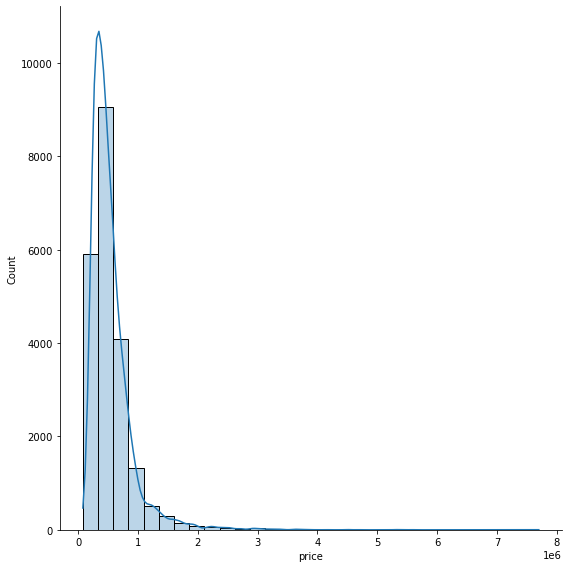

In [18]:
sns.displot(df['price'], kde=True, alpha=0.3, bins=30, height=8)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

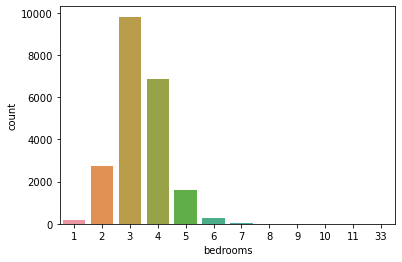

In [22]:
sns.countplot(data=df, x='bedrooms')

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

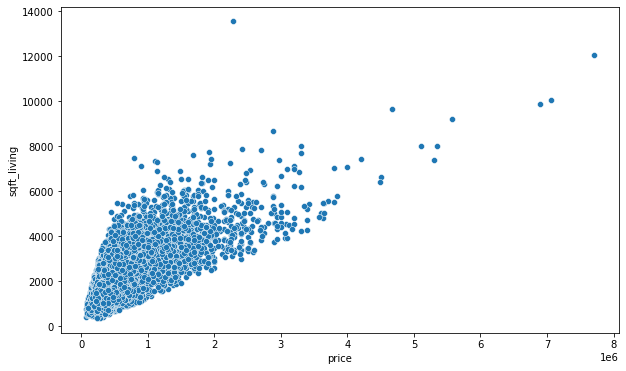

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='sqft_living')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

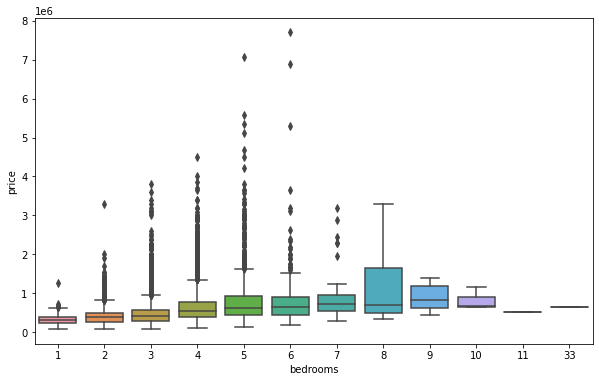

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='bedrooms', y='price')

### Geographical Properties

<AxesSubplot:xlabel='price', ylabel='long'>

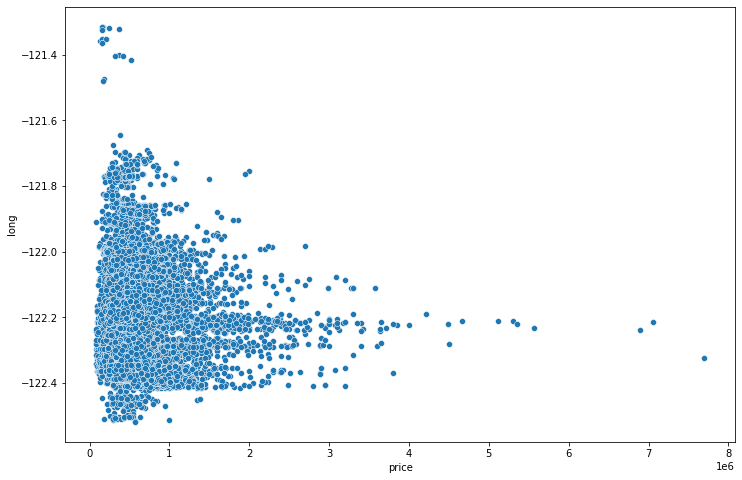

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='price', y='long')

<AxesSubplot:xlabel='price', ylabel='lat'>

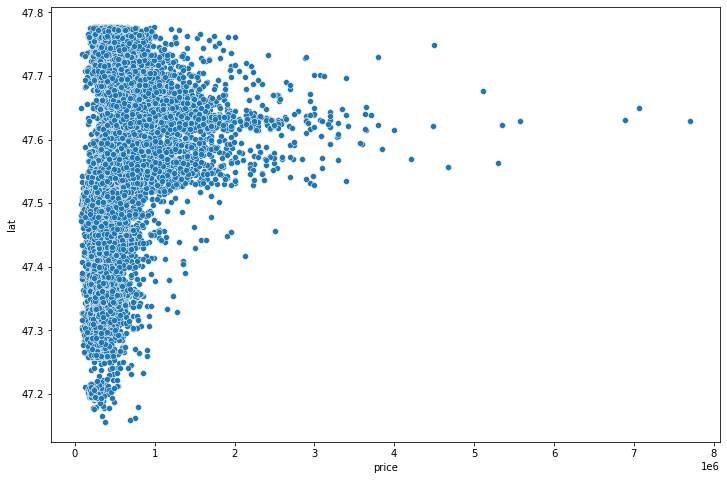

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='price', y='lat')

<AxesSubplot:xlabel='long', ylabel='lat'>

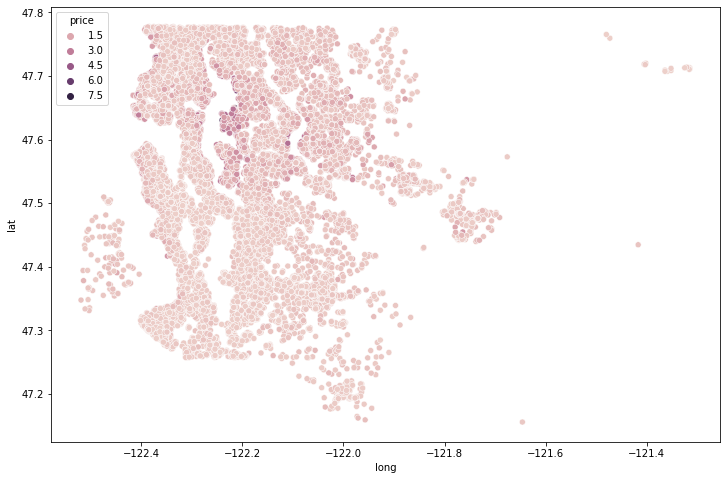

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price')

In [36]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [37]:
len(df) * 0.01  # Get the top 1% house in terms of price

215.97

In [38]:
non_top_1_perc = df.sort_values('price', ascending=False)[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

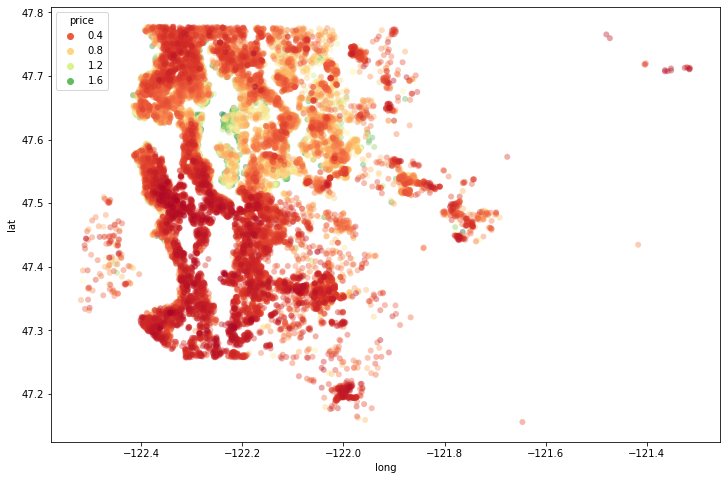

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=non_top_1_perc, x='long',
                y='lat', hue='price',
                palette='RdYlGn', ec=None,
                alpha=0.4)

### Other features

<AxesSubplot:xlabel='waterfront', ylabel='price'>

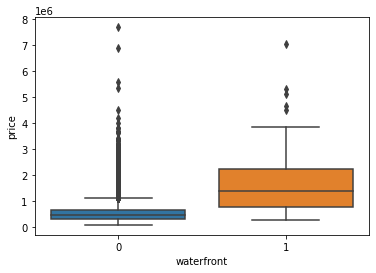

In [46]:
sns.boxplot(data=df, x='waterfront', y='price')

## Working with feature data

In [47]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [49]:
df = df.drop('id', axis=1)

In [50]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### Feature engineering from date

In [51]:
df['date'] = df['date'].apply(pd.to_datetime)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [55]:
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)

In [59]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015


<AxesSubplot:xlabel='year', ylabel='price'>

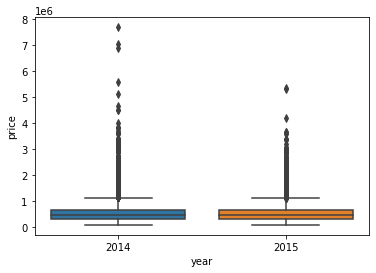

In [60]:
sns.boxplot(data=df, x='year', y='price')

<AxesSubplot:xlabel='month', ylabel='price'>

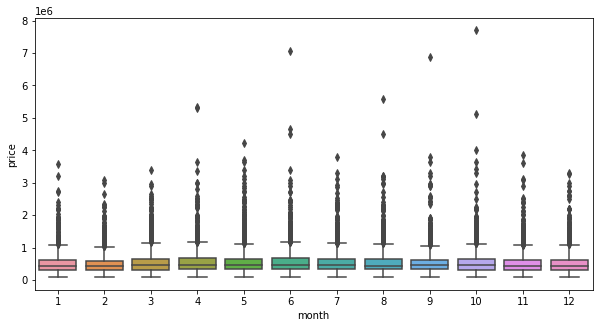

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='month', y='price')

<AxesSubplot:xlabel='month'>

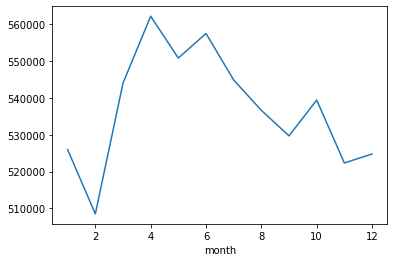

In [64]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

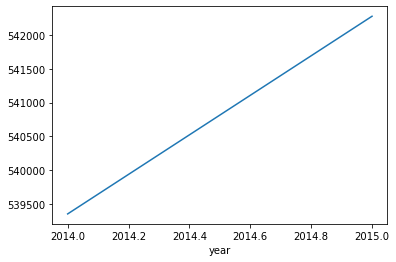

In [65]:
df.groupby('year').mean()['price'].plot()

In [66]:
df.drop('date', axis=1, inplace=True)

In [67]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [68]:
# Can either consider to remove or do some feature engineering to classify them
df.drop('zipcode', axis=1, inplace=True)

In [69]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [76]:
# There are 0s in these columns, but considering they still make sense when higher number correlates to 
# higher price, we keep it
df['yr_renovated'].value_counts(ascending=False)

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [77]:
df['sqft_basement'].value_counts(ascending=False)  # Can still make sense as bigger basement usually highly correlates with higher price

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [78]:
X = df.drop('price', axis=1)
y = df['price']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

### Scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
X_train = scaler.fit_transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

In [85]:
X_train.shape

(15117, 19)

In [86]:
X_test.shape

(6480, 19)

## Creating a Model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [90]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

## Training the Model

In [91]:
model.fit(X_train, y_train.values,
          batch_size=128,
          epochs=400,
          validation_data=(X_test,y_test.values))

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430238990336.0000 - val_loss: 418905620480.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 428974931968.0000 - val_loss: 414462902272.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 411224506368.0000 - val_loss: 374311649280.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 327962591232.0000 - val_loss: 243575701504.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 175397683200.0000 - val_loss: 111100100608.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 102681075712.0000 - val_loss: 94963499008.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 97380720640.0000 - val_loss: 93420978176.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95681904640.0000 - val_loss: 91813675008.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 38053322752.0000 - val_loss: 36768382976.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 37853106176.0000 - val_loss: 36564901888.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37705580544.0000 - val_loss: 36383993856.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37526044672.0000 - val_loss: 36219006976.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 37368770560.0000 - val_loss: 36039909376.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37204803584.0000 - val_loss: 35869716480.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37047001088.0000 - val_loss: 35716284416.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 36916088832.0000 - val_loss: 35546140672.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32795516928.0000 - val_loss: 31241832448.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32802959360.0000 - val_loss: 31182123008.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32760168448.0000 - val_loss: 31159875584.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32722415616.0000 - val_loss: 31139878912.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32664911872.0000 - val_loss: 31078105088.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32706256896.0000 - val_loss: 31052961792.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32611915776.0000 - val_loss: 31034148864.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32574525440.0000 - val_loss: 31015225344.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31272499200.0000 - val_loss: 29513398272.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31267784704.0000 - val_loss: 29556232192.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31241193472.0000 - val_loss: 29467148288.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31243669504.0000 - val_loss: 29439582208.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31223918592.0000 - val_loss: 29432428544.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 31212154880.0000 - val_loss: 29479983104.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31154718720.0000 - val_loss: 29382627328.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31160219648.0000 - val_loss: 29393166336.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30167500800.0000 - val_loss: 28169986048.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30245093376.0000 - val_loss: 28147355648.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30138097664.0000 - val_loss: 28173432832.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30116018176.0000 - val_loss: 28125863936.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30092773376.0000 - val_loss: 28172906496.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30112270336.0000 - val_loss: 28035078144.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30040344576.0000 - val_loss: 28119580672.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30030209024.0000 - val_loss: 28058171392.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29239162880.0000 - val_loss: 27156606976.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 29226115072.0000 - val_loss: 27084914688.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29232840704.0000 - val_loss: 27080787968.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29222438912.0000 - val_loss: 27068786688.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29187637248.0000 - val_loss: 27038691328.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29213229056.0000 - val_loss: 27004510208.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 29172430848.0000 - val_loss: 27012624384.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29219969024.0000 - val_loss: 27022243840.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 28612167680.0000 - val_loss: 26405394432.0000
Epoch 400/400
119/119 [==============================] - 0s 4ms/step - loss: 28637423616.0000 - val_loss: 26341107712.0000


In [92]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

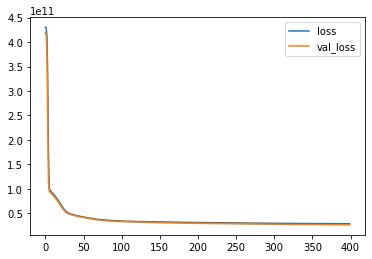

In [93]:
losses.plot()

## Evauluation on Test Data

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [96]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [97]:
predictions = model.predict(X_test)

In [102]:
mean_absolute_error(y_test, predictions)

100727.7034529321

In [103]:
mean_squared_error(y_test, predictions)

26341104842.212086

In [104]:
np.sqrt(mean_squared_error(y_test, predictions))

162299.42958067378

In [105]:
explained_variance_score(y_test, predictions)

0.8014405334805451

In [110]:
df['price'].mean()  # Considering the mean price of the houses, looking at our mean absolute error, our model is doing not too great

540296.5735055795

In [108]:
df['price'].median()

450000.0

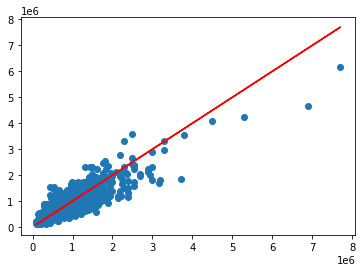

In [113]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c='r')

In [123]:
errors = y_test.values.reshape(6480, 1) - predictions

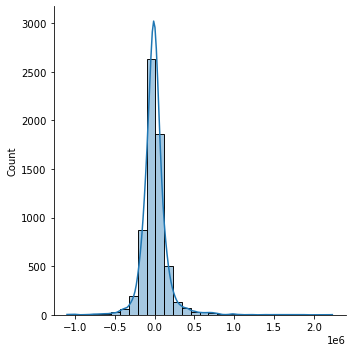

In [129]:
sns.displot(errors, bins=30, legend=False, kde=True, alpha=0.4)

## Predicting on a brand new house

In [130]:
single_house = df.drop('price', axis=1).iloc[5]

In [150]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [151]:
single_house

array([[0.3       , 0.64      , 0.52223371, 0.06142937, 0.        ,
        0.        , 0.        , 0.5       , 0.8       , 0.46870839,
        0.31742739, 0.87826087, 0.        , 0.80456812, 0.4269103 ,
        0.75047324, 0.11810401, 0.36363636, 0.        ]])

In [158]:
single_pred = model.predict(single_house)

In [159]:
df.iloc[5]

price            1.230000e+06
bedrooms         4.000000e+00
bathrooms        4.500000e+00
sqft_living      5.420000e+03
sqft_lot         1.019300e+05
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            1.100000e+01
sqft_above       3.890000e+03
sqft_basement    1.530000e+03
yr_built         2.001000e+03
yr_renovated     0.000000e+00
lat              4.765610e+01
long            -1.220050e+02
sqft_living15    4.760000e+03
sqft_lot15       1.019300e+05
month            5.000000e+00
year             2.014000e+03
Name: 5, dtype: float64

In [161]:
df.iloc[5]['price'] - single_pred[0, 0]

-151126.5

Not too good, further steps to be done are to remove the outliers from the data and find out if it makes the model predict better